In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import kraken as kr
import matplotlib.pyplot as plt
import numpy as np
import scanpy as sc

In [95]:
filenames = ['/home/sebastian/data/placenta_rebuttal/156KS_files/156KS_Decoded_ImmunePanel.csv',
'/home/sebastian/data/placenta_rebuttal/156KS_files/156KS_Decoded_KISS and CGA.csv',
'/home/sebastian/data/placenta_rebuttal/156KS_files/156KS_Decoded_PlacentaPanel.csv']
coord_tables=[]
for file_coordinates in filenames:
    coord_tables.append(pd.read_csv(file_coordinates))
    
adata = sc.read_h5ad('/home/sebastian/data/Placenta_normalized_Seurat_markers.h5ad')

coordinates=pd.concat(coord_tables)

In [96]:
# # coordinates = pd.read_csv('/home/sebastian/data/placenta_rebuttal/data_sample_1/coordinates.csv')

# file_coordinates = 'data/spatial/placenta_overview/10'
# coordinates = pd.read_csv(file_coordinates)
# adata = sc.read_h5ad('/home/sebastian/data/Placenta_normalized_Seurat_markers.h5ad')

In [97]:
# # sample_id = '105'

# # specs for spatial samples ['disease','time','tissue']
# sample_specs = {'102':['C','early','Villi'],
#                 '103':['C','late','Villi'],
#                 '104':['C','late','Villi'],
#                 '105':['D','late','Villi'],
#                 '106':['C','late','Villi'],
#                 '107':['D','late','Villi'],
#                 '156':['C','late','Villi'],}

# # if sample_id in file_coordinates:
# disease=sample_specs[file_coordinates.split('/')[-1][:3]][0]
# time=sample_specs[file_coordinates.split('/')[-1][:3]][1]
# tissue=sample_specs[file_coordinates.split('/')[-1][:3]][2]

    
# adata = adata[((adata.obs['disease']==disease) & 
#          (adata.obs['tissue']==tissue) &
#          (adata.obs['time']==time))]

# # adata.obs['tissue']#.iloc[0]
# # adata.obs['time']

In [98]:
coordinates.gene.replace('HBA1/2','HBA1', inplace=True)
coordinates.gene.replace('KISS','KISS1', inplace=True)


In [99]:
spatial = kr.SpatialData(coordinates.gene, coordinates.X, coordinates.Y)#)gene_tag='gene')
# sc = kr.ScData(adata)


<Figure size 720x720 with 0 Axes>

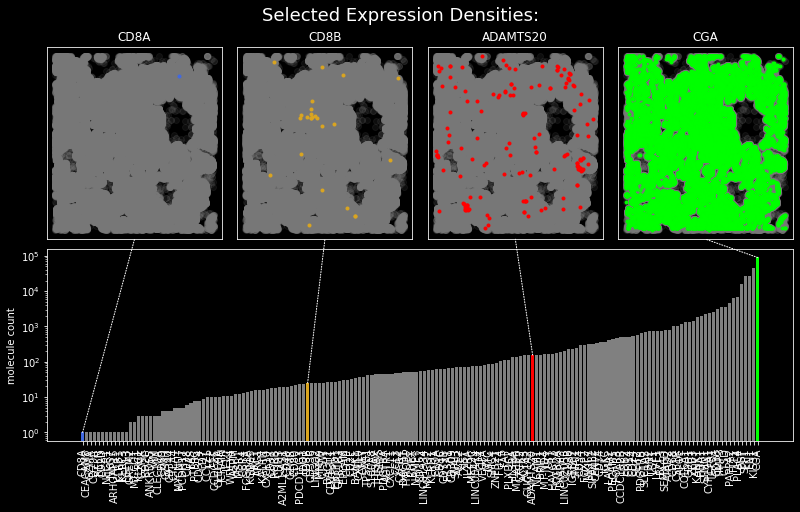

In [100]:
plt.figure(figsize=(10,10))

spatial.plot_overview()


In [101]:
# spatial = kr.SpatialData(coordinates,gene_tag='gene')
# sc = kr.ScData(coordinates.iloc[:])

adata,spatial=kr.synchronize(adata,spatial,1,200)

Removing ACTA3, which is not present in SC data
Removing HAVCR3, which is not present in SC data
Removing ZEB3, which is not present in SC data
Removing CD2G, which is not present in SC data
Removing FUT4, which is not present in SC data
Removing CD374, which is not present in SC data
Removing CD336, which is not present in SC data
Removing CD162, which is not present in SC data
Removing CD2D, which is not present in SC data
Removing CD309, which is not present in SC data
Removing KLRC3, which is not present in SC data
Removing PDCD1LG3, which is not present in SC data
Removing CD344, which is not present in SC data
Removing CTSD, which is not present in SC data
Removing CD2E, which is not present in SC data
A2ML1-AS1
Removing A2ML1-AS1, low count in spatial data
ACE2
Removing ACE2, low count in spatial data
ADAMTS20
Removing ADAMTS20, low count in spatial data
AGTR1
Removing AGTR1, low count in spatial data
ANKRD55
Removing ANKRD55, low count in spatial data
APOE
ARG1
Removing ARG1, l

In [102]:
# adata.shape

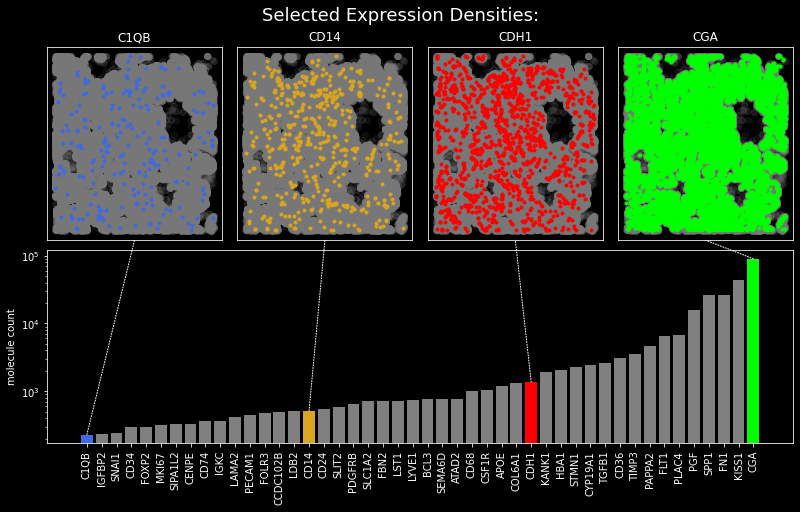

In [103]:
# plt.figure(figsize=(15,10))

# kr.compare_counts(sc,spatial)
spatial.plot_overview()
# spatial.plot_bars()

<Figure size 1800x1800 with 0 Axes>

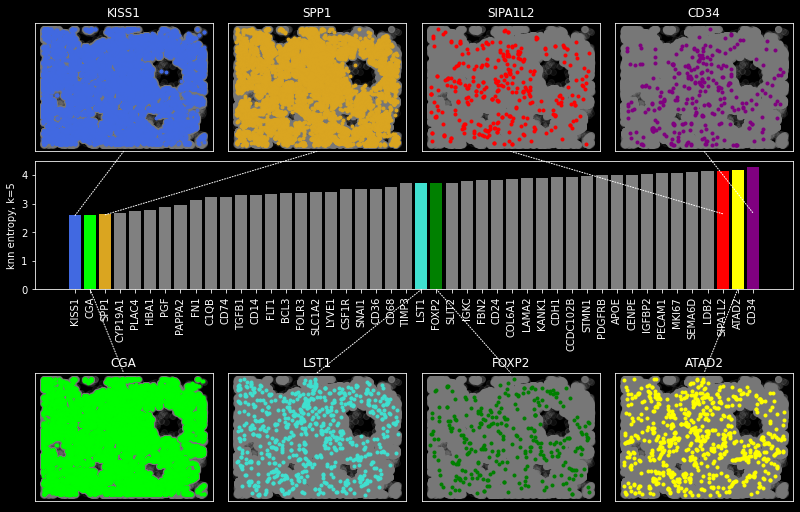

In [104]:
spatial.plot_entropy(n_neighbors=5)

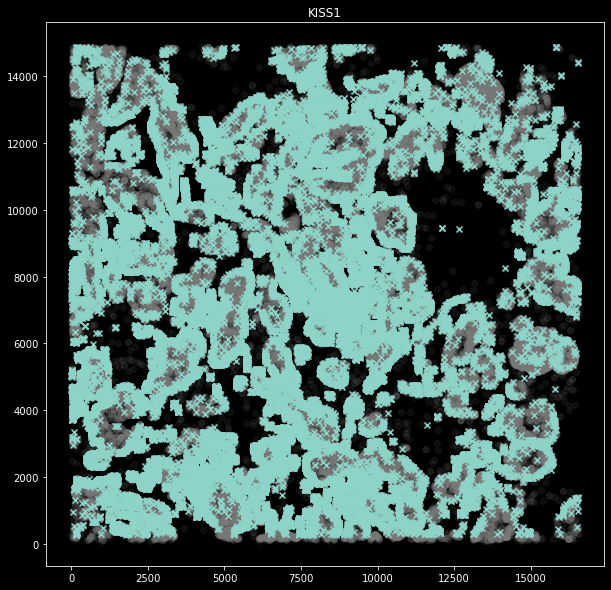

In [105]:
plt.figure(figsize=(10,10))
spatial.scatter('KISS1', marker='x')

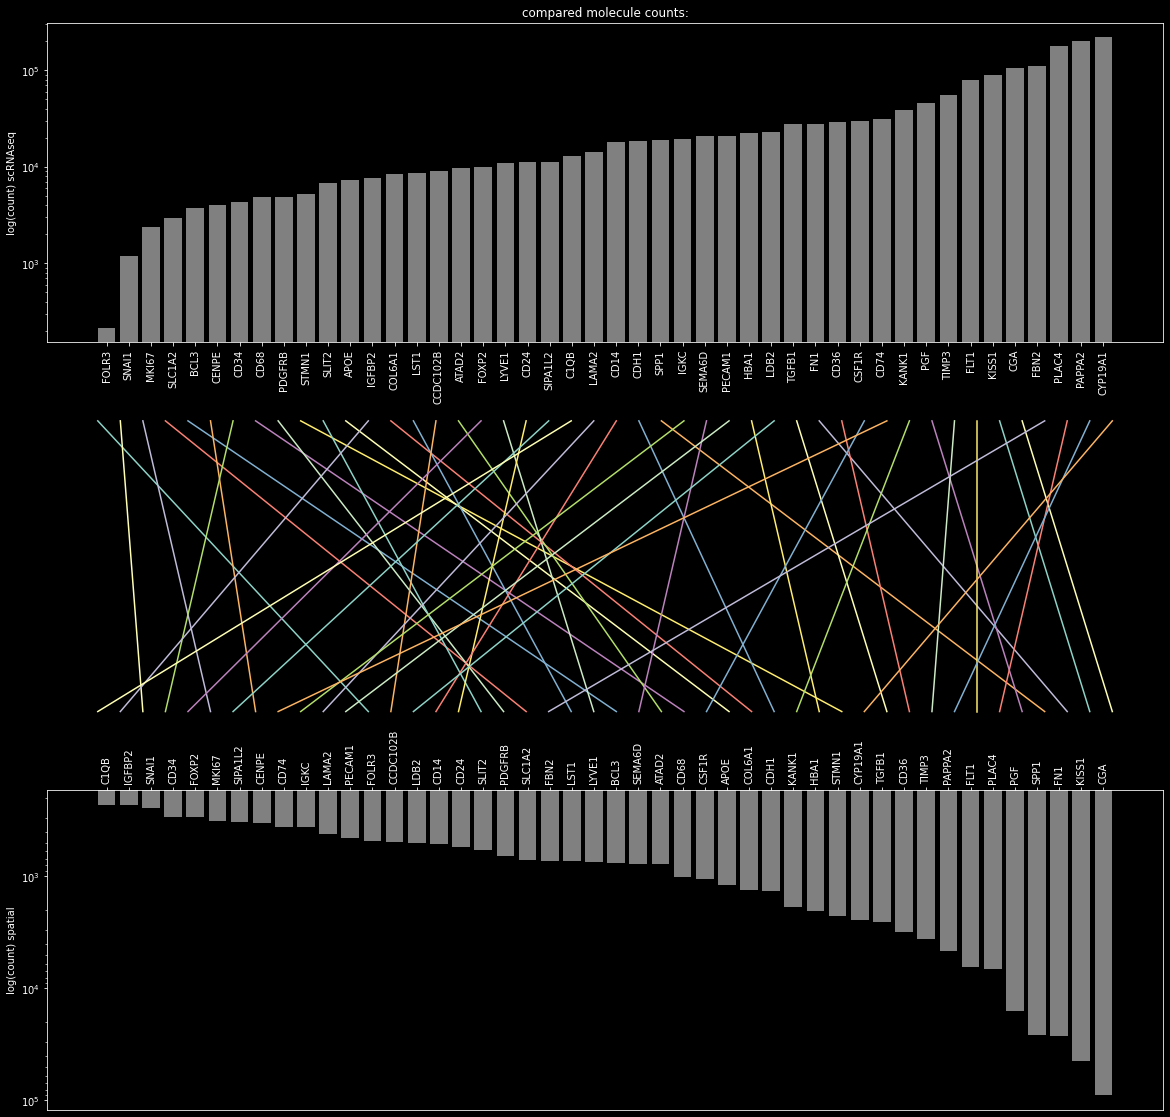

In [106]:
plt.figure(figsize=(20,20))
kr.compare_counts(adata,spatial)

In [14]:
assert False

AssertionError: 

In [ ]:
# coordinates_cortex = pd.read_csv('data/coordinates_cortex.csv')
# spatial_cortex = kr.SpatialData(coordinates_cortex.genes, coordinates_cortex.X, coordinates_cortex.Y)#)gene_tag='gene')

# # adata_cortex=sc.read_h5ad("data/adata_processed_sc.h5ad")

In [ ]:
plt.figure(figsize=(15,25))
spatial.scatter('KISS1',marker='.')

In [ ]:
# spatial_cortex.plot_entropy(n_neighbors=6)

In [ ]:
# coordinates_cortex.loc[coordinates_cortex.genes=='Lamp5','X']+=np.random.normal(size=((coordinates_cortex.genes=='Lamp5').sum(),))*20
# coordinates_cortex.loc[coordinates_cortex.genes=='Lamp5','Y']+=np.random.normal(size=((coordinates_cortex.genes=='Lamp5').sum(),))*20
# spatial_cortex = kr.SpatialData(coordinates_cortex.genes, coordinates_cortex.X, coordinates_cortex.Y)#)gene_tag='gene')


In [ ]:
coordinates.loc[coordinates.gene=='KISS1','X']+=np.random.normal(size=((coordinates.gene=='KISS1').sum(),))*20
coordinates.loc[coordinates.gene=='KISS1','Y']+=np.random.normal(size=((coordinates.gene=='KISS1').sum(),))*20
spatial = kr.SpatialData(coordinates.gene, coordinates.X, coordinates.Y)#)gene_tag='gene')


In [ ]:
plt.figure(figsize=(15,25))
spatial_cortex.scatter('Lamp5',marker='.')

In [ ]:
# spatial_cortex = kr.SpatialData(coordinates_cortex.genes, coordinates_cortex.X, coordinates_cortex.Y)#)gene_tag='gene')
spatial.plot_entropy()

In [ ]:
from sklearn.neighbors import NearestNeighbors

knn = NearestNeighbors(n_neighbors=12)

coords = np.stack([spatial.data.X, spatial.data.Y]).T
knn.fit(coords)
distances, indices = knn.kneighbors(coords)

knn_cells = np.zeros_like(indices)
for i in range(indices.shape[1]):
    knn_cells[:, i] = spatial.data['gene_id'].iloc[indices[:, i]]


In [ ]:
plt.figure(figsize=(8,25))

H = []

for i in range(spatial.data['gene_id'].max()+1):
    x = knn_cells[spatial.data.gene_id==i]

    _, n_x = np.unique(x[:,1:], return_counts=True)
        
    p_x = n_x/(n_x.sum())
    print(spatial.gene_classes[i], p_x.max())
    
    h_i = -(p_x*np.log2(p_x)).sum()
    H.append(h_i)
    plt.plot((p_x)+i/2)
    plt.plot(np.zeros_like(p_x)+i/2,c='grey')
    
# plt.bar(np.arange(len(H)),H)    
# plt.yticks(np.arange(len(H))/2,spatial_cortex.gene_classes, rotation=90)
plt.yticks(np.arange(len(H))/2,spatial.gene_classes, rotation=0)

plt.show()
# plt.yscale('log')

In [ ]:
p_x

In [ ]:
spatial_cortex.plot_overview()

In [ ]:
(adata_cortex,spatial_cortex) = kr.synchronize(adata_cortex,spatial_cortex,0,0)

In [ ]:
plt.figure(figsize=(10,10))
kr.compare_counts(adata_cortex,spatial_cortex)

In [ ]:
fig = plt.figure(figsize=(7,7))

ax = fig.subplots(1)

ax.plot(np.random.normal(size=(30,)))
# plt.xticks(np.arange(30),np.arange(30))

print("Dot per inch(DPI) for the figure is: ", fig.dpi)
bbox = ax.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
width, height = bbox.width, bbox.height
print("Axis sizes are(in pixels):", width, height)


In [ ]:
import scvi


adata_spatial = scvi.data.smfish(save_path='data/')

In [ ]:
adata_spatial_anterior = scpy.datasets.visium_sge(
    sample_id="V1_Mouse_Brain_Sagittal_Anterior"
)

In [ ]:
scpy.pl.spatial(adata_spatial_anterior)

In [ ]:
adata_spatial_anterior.uns['spatial'].keys()

In [ ]:
import scipy
import sys

In [ ]:
                      
X = scipy.sparse.csr_matrix((np.ones((coordinates.shape[0],)),
                             (np.arange(coordinates.shape[0]),
                                          coordinates.gene.apply(lambda x: newobj.var.index.get_loc(x)))),
                           shape=(coordinates.shape[0], len(adata.var)))
                              
# for i,c in coordinates.iterrows():
#     newobj.X[i,newobj.var.index==c.gene]=1
newobj = scpy.AnnData(X, var=adata.var)
    
newobj.obsm['spatial']  = np.array(coordinates[['X','Y']])
# newobj.obsm['Y']  = np.array(coordinates['Y'])

In [ ]:
                          
scpy.pl.spatial(newobj, spot_size=0.5)

In [ ]:
# newobj.obsm['spatial']
adata_spatial_anterior.uns['spatial']

In [ ]:
import squidpy as sq
adata_squid= sq.datasets.slideseqv2()

In [ ]:
scpy.pl.spatial(adata_squid, color="cluster", spot_size=10)

In [ ]:
adata_squid.shape